<a href="https://colab.research.google.com/github/moodychinsaki/MLprojectt/blob/main/Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model3 is Data Augmentation and Dropout included version of Model 3 and deals with Overfitting that we faced earlier

Model 3 (Improved version of Model2hypt)

In [45]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.layers import Dropout
model2 = Sequential(name="MODEL_2hypt")
#Data Augmentation
model2.add(RandomFlip('horizontal'))
model2.add(RandomRotation(0.15))
model2.add(RandomZoom(0.15))
# add padding to the first Conv2D layer
model2.add(Conv2D(32, (3, 3), strides=(2, 2) ,input_shape=image_size, padding='valid'))  
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) 

model2.add(Conv2D(128, (3, 3), strides=(2, 2), padding='valid' ))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# added hidden layer model2hypt
model2.add(Conv2D(256, (3, 3), strides=(2, 2), padding='valid'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout
model2.add(Dropout(0.25))

model2.add(Flatten())  
model2.add(Dense(32))
#Dropout
model2.add(Dropout(0.30))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

In [52]:
model2.summary()

Model: "MODEL_2hypt"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_4 (RandomFlip)  (None, None, None, None)  0         
                                                                 
 random_rotation_3 (RandomRo  (None, None, None, None)  0        
 tation)                                                         
                                                                 
 random_zoom_2 (RandomZoom)  (None, None, None, None)  0         
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 activation_11 (Activation)  (None, None, None, 32)    0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                   

In [47]:
# Compile
#model2 = model_2_specification()
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
tensorboard = keras.callbacks.TensorBoard(log_dir="./results",)

In [48]:
# Fit, plot and validate the model
step_size_train = trainPlusvalid_gen.n//trainPlusvalid_gen.batch_size
step_size_validation = test_gen.n//test_gen.batch_size

fit2 = model2.fit_generator(generator= trainPlusvalid_gen,
                    steps_per_epoch=step_size_train,
                    validation_data=test_gen,
                    validation_steps=step_size_validation,
                    epochs=20, 
                    callbacks=[tensorboard])

<ipython-input-48-c2c3d933b424>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit2 = model2.fit_generator(generator= trainPlusvalid_gen,


Epoch 1/20
208/208 [==============================] - 89s 411ms/step - loss: 0.6590 - accuracy: 0.5894 - val_loss: 0.6812 - val_accuracy: 0.5581
Epoch 2/20
208/208 [==============================] - 81s 389ms/step - loss: 0.5922 - accuracy: 0.6884 - val_loss: 0.5485 - val_accuracy: 0.7156
Epoch 3/20
208/208 [==============================] - 85s 409ms/step - loss: 0.5599 - accuracy: 0.7122 - val_loss: 0.5113 - val_accuracy: 0.7489
Epoch 4/20
208/208 [==============================] - 84s 406ms/step - loss: 0.5326 - accuracy: 0.7352 - val_loss: 0.5132 - val_accuracy: 0.7472
Epoch 5/20
208/208 [==============================] - 84s 404ms/step - loss: 0.5144 - accuracy: 0.7485 - val_loss: 0.4663 - val_accuracy: 0.7808
Epoch 6/20
208/208 [==============================] - 83s 398ms/step - loss: 0.4953 - accuracy: 0.7609 - val_loss: 0.4422 - val_accuracy: 0.7964
Epoch 7/20
208/208 [==============================] - 84s 402ms/step - loss: 0.4864 - accuracy: 0.7646 - val_loss: 0.4749 - val_ac

In [49]:
test_loss, test_acc = model2.evaluate(test_gen)
print("Test Loss: "+str(test_loss))
print("Test Accuracy: "+str(test_acc))

53/53 [==============================] - 16s 295ms/step - loss: 0.3484 - accuracy: 0.8490
Test Loss: 0.3484468460083008
Test Accuracy: 0.8489961624145508


In [53]:
def plot_loss_curves(fit2):
    
   
    train_loss=fit2.history['loss']
    val_loss=fit2.history['val_loss']

    train_accuracy=fit2.history['accuracy']
    val_accuracy=fit2.history['val_accuracy']

    epochs=range(1,len(fit2.history['loss'])+1)        # 0 , ... + 5 if epochs was bigger than 50ish
    plt.figure(figsize=(20,7))

     # plot accuracy data
    plt.subplot(1,2,2)
    plt.plot(epochs,train_accuracy,label="training_acc", color='red')
    plt.plot(epochs,val_accuracy,label="validation_acc", color='green')
    plt.title("MODEL_3 Accuracy curves")
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()

  # plot loss data
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,label="training_loss", color='red' )
    plt.plot(epochs,val_loss,label="validation_loss", color='green')
    plt.title("MODEL_3 Loss curves")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()

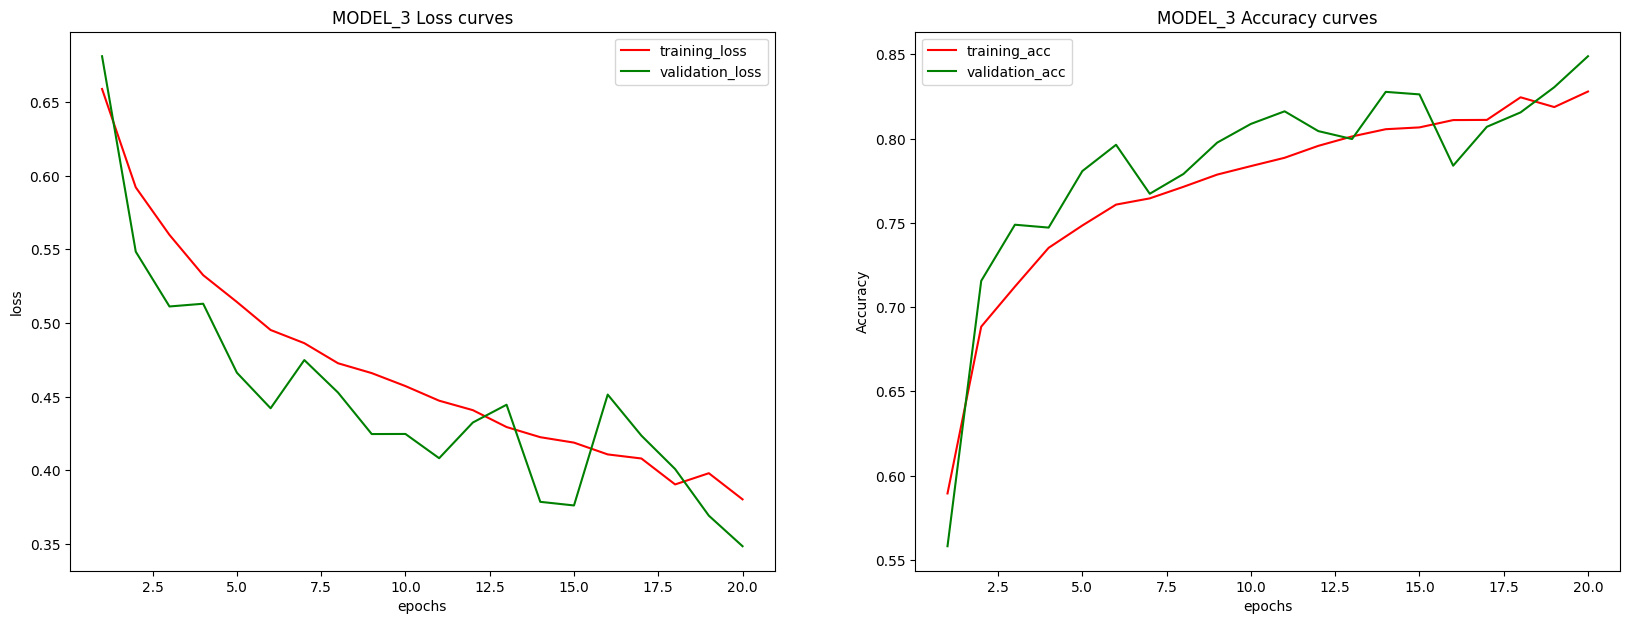

In [54]:
plot_loss_curves(fit2)